In [17]:
import pandas as pd
data = pd.read_csv('consumerPrices_tree.csv')
data.head()

,都道府県,食料,住居,水道光熱費,家具家事用品,衣類,保険医療,交通通信,教育,教養娯楽,諸雑費,大都市圏分類
0,北 海 道,98.7,82.6,116.3,99.3,103.8,100.2,99.5,93.2,97.1,100.9,1
1,青 森 県,97.4,95.7,109.0,96.2,97.1,101.0,100.5,93.2,96.4,97.8,0
2,岩 手 県,96.6,89.4,111.0,102.2,97.8,100.4,99.7,90.1,99.8,97.0,0
3,宮 城 県,97.2,97.1,101.3,104.0,95.6,100.9,97.5,99.5,99.3,99.2,1
4,秋 田 県,97.3,86.1,107.2,103.1,102.4,98.9,98.0,87.1,98.0,100.2,0


In [18]:
X = data.drop(['都道府県', '大都市圏分類'], axis=1)
Y = data['大都市圏分類']

<div style="font-size:20px; color:pink; margin:20px">
決定木vsロジスティック回帰 - 分類結果の違い
</div>
<div style="font-size:14px; color:white; margin:20px">
手法の違いを見ていきましょう。<br>
まずは、前回使用した「決定木」と新たに「ロジスティック回帰」を用いて、<br>
分類結果にどのような違いが見られるかを見ていきましょう。<br>
決定木は、前回もお伝えしたように、最もきれいに分割できる説明変数およびその条件を探す作業を、<br>
木構造状に派生させていく手法です。<br>
一方、ロジスティック回帰は、多変数(説明変数)に対してきれいに分割できる線を引く手法です。<br>
回帰という名前がついていますが、実際には分類問題を解く手法<br>
<br>
今回は、訓練・テストデータの分割等は一切考慮せずに、予測結果にどんな違いがあるのかを見ていきましょう。<br>
まずは、決定木による学習を行い、作成された機械学習モデルを用いて分類を行なった結果を表示してみます。<br>
</div>

In [19]:
# 決定木の呼び出し
from sklearn.tree import DecisionTreeClassifier
# モデルの条件を指定
# random_state
# => 乱数を制御するパラメータ。Noneにすると毎回違うデータが生成されが、整数をシードとして渡すと毎回同じデータが生成される
treeModel = DecisionTreeClassifier(max_depth=3, random_state=0)
# 教師データの学習を実行し、機械学習モデルを作成
treeModel.fit(X, Y)
# 予測結果は、treeModel.predict(X)を実行することで、
# 今回作成したtreeModelにおいて説明変数Xを予測した結果を取得できます。
predicted = pd.DataFrame({'TreePredicted':treeModel.predict(X)})
# 見やすくするために、元データに追加する形でデータを整えています
data_predicted = pd.concat([data, predicted], axis=1)
data_predicted.head()

,都道府県,食料,住居,水道光熱費,家具家事用品,衣類,保険医療,交通通信,教育,教養娯楽,諸雑費,大都市圏分類,TreePredicted
0,北 海 道,98.7,82.6,116.3,99.3,103.8,100.2,99.5,93.2,97.1,100.9,1,1
1,青 森 県,97.4,95.7,109.0,96.2,97.1,101.0,100.5,93.2,96.4,97.8,0,0
2,岩 手 県,96.6,89.4,111.0,102.2,97.8,100.4,99.7,90.1,99.8,97.0,0,0
3,宮 城 県,97.2,97.1,101.3,104.0,95.6,100.9,97.5,99.5,99.3,99.2,1,0
4,秋 田 県,97.3,86.1,107.2,103.1,102.4,98.9,98.0,87.1,98.0,100.2,0,0


<div style="font-size:14px; color:white; margin:20px">
続けて、ロジスティック回帰を用いた予測を行い、先ほどのdata_predictedに追加する
</div>

In [20]:
# 機械学習ライブラリscikit-learn(sklearn)のなかから、ロジスティック回帰(LogisticRegression)を呼び出し
from sklearn.linear_model import LogisticRegression
# logisticModelという名前でロジスティック回帰を使う宣言
# => 決定木の場合はモデルの条件を指定したが、今回はすべてデフォルトのものを使用するので指定せずに定義
logisticModel = LogisticRegression()
# モデルに教師データを代入して、学習を実行し、機械学習モデルを作成
logisticModel.fit(X, Y)
# 「モデル名.predict(予測に用いる説明変数)」で、予測値を抽出
# (決定木のときと同様に、)
predicted = pd.DataFrame({'LogisPredicted':logisticModel.predict(X)})
# 先ほどのデータに、LogisPredicted列を追加
data_predicted = pd.concat([data_predicted, predicted], axis=1)
data_predicted

,都道府県,食料,住居,水道光熱費,家具家事用品,衣類,保険医療,交通通信,教育,教養娯楽,諸雑費,大都市圏分類,TreePredicted,LogisPredicted
0,北 海 道,98.7,82.6,116.3,99.3,103.8,100.2,99.5,93.2,97.1,100.9,1,1,0
1,青 森 県,97.4,95.7,109.0,96.2,97.1,101.0,100.5,93.2,96.4,97.8,0,0,0
2,岩 手 県,96.6,89.4,111.0,102.2,97.8,100.4,99.7,90.1,99.8,97.0,0,0,0
3,宮 城 県,97.2,97.1,101.3,104.0,95.6,100.9,97.5,99.5,99.3,99.2,1,0,1
4,秋 田 県,97.3,86.1,107.2,103.1,102.4,98.9,98.0,87.1,98.0,100.2,0,0,0
5,山 形 県,101.7,91.3,111.6,93.5,105.7,97.0,99.7,105.4,99.1,97.6,0,0,0
6,福 島 県,100.0,92.5,108.6,100.9,106.2,99.9,98.8,90.9,96.6,102.9,0,1,0
7,茨 城 県,99.1,96.3,101.9,93.0,97.5,98.0,96.7,89.5,95.2,101.4,0,0,0
8,栃 木 県,99.5,87.9,96.7,100.3,115.7,99.1,97.7,101.9,94.9,99.8,0,0,0
9,群 馬 県,99.1,87.5,91.2,96.9,98.2,100.0,97.1,79.9,95.5,98.9,0,1,0


<div style="font-size:14px; color:white; margin:20px">
データを上から順番に見ていくと、ロジスティック回帰では、一番上の北海道の予測が外れています。<br>
しかし、逆に宮城県においては、決定木では外れていますが、ロジスティック回帰の場合は当たっています。<br>
このように、ロジスティック回帰と決定木では、同じ教師データを用いているのにもかかわらず、<br>
予測結果に違いが出ていることがわかります。<br>
ではこの違いはどこにあるのでしょうか。まずは決定木手法について可視化を行いながら見ていく<br>
</div>

<div style="font-size:20px; color:pink; margin:20px">
決定木を紐解いていく
</div>
<div style="font-size:14px; color:white; margin:20px">
決定木は、最もきれいに1/0を分類する変数とその条件を見つけて、木構造状に分類を行なっていきます。<br>
今回の例では、たまたま教養娯楽、保険医療のみである程度分類が行えることが前回の結果からわかっています。<br>
では、教養娯楽、保険医療のデータを可視化してみましょう。
</div>

Text(0,0.5,'Culture & recreation')

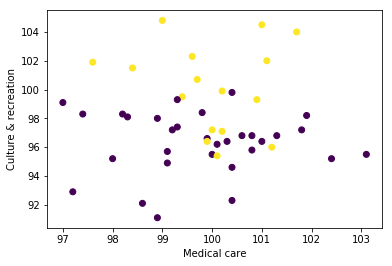

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data_predicted['保険医療'], data_predicted['教養娯楽'], c=data_predicted['大都市圏分類'])
plt.xlabel('Medical care')
plt.ylabel('Culture & recreation')

<div style="font-size:14px; color:white; margin:20px">
黄色が、大都市圏分類列における1、つまり大都市圏を含んだ都道府県になります。<br>
これを見ると、教養娯楽の値が高いものは、ほぼ大都市圏に分類できることがわかります。<br>
これは、前回の木構造で示した一番上の分岐そのものです。<br>
では、前回出力した木構造をベースに、決定木を見ていきましょう。<br>
</div>

<div style="font-size:14px; color:white; margin:20px">
決定木は、最もきれいに分割できる方法を探していきます。<br>
この場合、大都市圏であるClass1かどうかを最もきれいに分割する方法が、分岐1の教養娯楽が99.85以下かどうかです。<br>
99.85より大きい領域では、すべてClass1に分けられます。<br>
次に、保険医療が99.35以下かどうかでグラフの最も左側の領域をClass0として分けられます。<br>
さらに、保険医療が100.25より高い領域もClass0として分類しています。<br>
保険医療が100.25以下の領域は、Class0が4個、Class1が5個となり、精度が良い分類とは言えません。<br>
さらに階層を増やすことで、きれいに分割することはできますが、過学習に注意しなくてはなりません。<br>
<br>
最後に、予測結果を可視化しておきましょう。<br>
</div>

Text(0,0.5,'Culture & recreation')

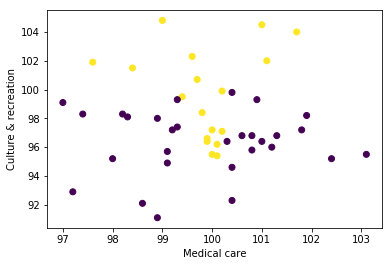

In [23]:
# 色分けの指定(c=XX)にTreePredictedを与えている
# => 決定木によって予測した分類結果を色分けして表示
plt.scatter(data_predicted['保険医療'],data_predicted['教養娯楽'], c=data_predicted['TreePredicted'])
plt.xlabel('Medical care')
plt.ylabel('Culture & recreation')

<div style="font-size:14px; color:white; margin:20px">
比較的直感的で、場合分けによって細かく分岐していくのが決定木の分類プロセスです。<br>
そのため、保険医療が99.35以下、100.25より大きい部分はClass0というような飛び地のような条件を作り出してくれる<br>
</div>

<div style="font-size:20px; color:pink; margin:20px">
ロジスティック回帰を紐解いていく
</div>
<div style="font-size:14px; color:white; margin:20px">
こちらは、決定木ほど直感的ではないのですが、分割できる直線を引くというのは同じ<br>
まずは、決定木で使用した保険医療、教養娯楽の散布図をプロットし、ロジスティック回帰による分類をもとに色分け<br>
</div>

Text(0,0.5,'Culture & recreation')

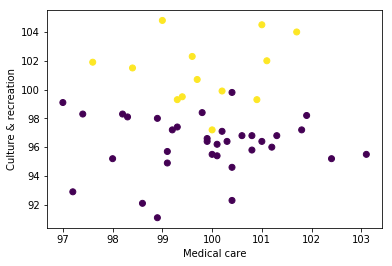

In [24]:
plt.scatter(data_predicted['保険医療'], data_predicted['教養娯楽'], c=data_predicted['LogisPredicted'])
plt.xlabel('Medical care')
plt.ylabel('Culture & recreation')

<div style="font-size:14px; color:white; margin:20px">
色分けの変数にLogisPredictedを与えている以外は、先ほどとまったく同じ<br>
これを見ると、決定木により分けられたものとは大きく違います。<br>
特に、決定木で表現できていた飛び地部分は見られず、大きくは上下に分割しているように見えます。<br>
ロジスティック回帰も決定木と同様に線を引く作業ではありますが、<br>
こちらは説明変数すべてを考慮した形で、分割に適した線を導き出します。<br>
これは、線形回帰をイメージすると良いでしょう。<br>
実は、ロジスティック回帰は、線形回帰の関数Y=aX1+bX2+zを0から1の範囲に押し込めてしまう関数を使用し、
0/1の分類を行なっています。<br>
そのため、線形回帰のときと同様に、2変数ではきれいに表現できますが、今回のケースのように10変数ではイメージできません。<br>
そこで、2変数でロジスティック回帰を実行して、可視化してみましょう。<br>
<br>
精度は一度考慮せず、このまま保険医療、教養娯楽を使っていきます。<br>
</div>

In [28]:
# 説明変数として保険医療、教養娯楽の2変数を取り出し
X_logis = X[['保険医療', '教養娯楽']]
# 先ほどと同様に、ロジスティック回帰のモデル定義から学習を実施
logisticModel2 = LogisticRegression()
# 機械学習モデルの作成
logisticModel2.fit(X_logis, Y)
# 予測結果は、logisticModel2.predict(X_logis)を実行することで、
# 今回作成したlogisticModel2において説明変数X_logisを予測した結果を取得
predicted = pd.DataFrame({'LogisPredicted2':logisticModel2.predict(X_logis)})
# 今回の予測結果を可視化するために、データを整える
logis_predicted = pd.concat([X_logis, predicted], axis=1)
logis_predicted.head()

,保険医療,教養娯楽,LogisPredicted2
0,100.2,97.1,0
1,101.0,96.4,0
2,100.4,99.8,0
3,100.9,99.3,0
4,98.9,98.0,0


<div style="font-size:14px; color:white; margin:20px">
続いて可視化<br>
今回は、散布図に加えて、作成した機械学習モデルから算出できる分割線も表示<br>
</div>

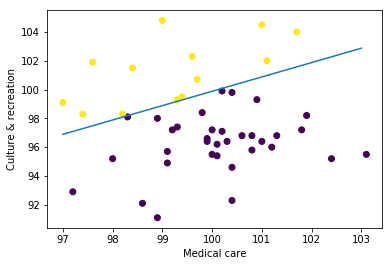

In [34]:
# nupmy(数値計算用ライブラリ)をimport
import numpy as np
# 散布図の可視化。色分けに関しては、2変数によって作成した機械学習モデルの予測結果を指定
plt.scatter(logis_predicted['保険医療'], logis_predicted['教養娯楽'], c=logis_predicted['LogisPredicted2'])
plt.xlabel('Medical care')
plt.ylabel('Culture & recreation')
# 今回のモデルから算出した分割線の可視化
# 線形回帰式の[Y = aX1+ bX2 + z]をイメージし、Y=0として変形すると、一番下の式になる
# a、b、zの値は、5から7行目で機械学習モデルから抽出
# 線形回帰のときと同様、このa、b、zが線を引くために必要な数値で、
# これらを教師データから算出することが線を引く(=学習)ことと同義
a = logisticModel2.coef_[0, 0]
b = logisticModel2.coef_[0, 1]
x = logisticModel2.intercept_[0]
x = np.arange(97, 104, 1)
plt.plot(x,(-a*x-z)/b)

<div style="font-size:14px; color:white; margin:20px">
決定木のように条件分岐によって線を引いていくのではなく、あくまでも多変数の式を元に分割線を引くのがロジスティック回帰<br>
2変数であれば直線、3変数であれば分割する平面を書くことになります。<br>
これだけ聞くと決定木の方が、スマートに分割できるような錯覚に陥るのですが、<br>
ロジスティック回帰は、多変数を上手に扱えるため、とても有効な手法です。<br>
訓練・テストデータを分割して正確にモデル精度を検証しないと優劣はつけられませんが、<br>
今回作成した決定木とロジスティック回帰モデルにおける単純な正答率は、ほぼ同じ値を示しています。<br>
<br>
さて、今回は、教師あり学習/分類に関して、前回よりもさらに一歩進んで、機械学習手法の違いを紐解いてきました。<br>
数学的な説明は割愛しましたが、手法の違いがどういったものなのかが直感的にイメージできましたでしょうか。<br>
今回取り上げた決定木やロジスティック回帰以外にも多くの手法が存在し、そこには必ず意味があります。<br>
それらの違いを理解し、データに合わせて適切に手法を選択していくのが重要です。<br>
少しずつさまざまな手法に挑戦し、その違いを紐解きながら理解を深めていくと良いと思います。<br>
